<a href="https://colab.research.google.com/github/AlinaStrav/Practical_Project_Neural_Networks_for_Tabular_Data/blob/main/Practical_project_6_Alina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
import numpy as np
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

train_data.shape


(404, 13)

In [ ]:
train_data.shape[1]

13

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(32, activation='relu')) 
  model.add(layers.Dense(1)) # no activation
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#   RMSprop = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001)
#   model.compile(optimizer=RMSprop, loss='mse', metrics=['mae'])
#   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 65
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
 
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=2, verbose=1)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

print(f"All scores: {(all_scores)}, mean: {(np.mean(all_scores))}")
print(f"min: {min(train_targets)}, max: {max(train_targets)}") 
print(f"{np.mean(all_scores) / max(train_targets)} % error")

processing fold # 0
Epoch 1/65
152/152 [==============================] - 2s 2ms/step - loss: 249.8922 - mae: 12.2043
Epoch 2/65
152/152 [==============================] - 0s 2ms/step - loss: 24.7764 - mae: 3.3658
Epoch 3/65
152/152 [==============================] - 0s 2ms/step - loss: 19.8118 - mae: 2.9921
Epoch 4/65
152/152 [==============================] - 0s 2ms/step - loss: 16.8080 - mae: 2.8800
Epoch 5/65
152/152 [==============================] - 0s 3ms/step - loss: 14.0875 - mae: 2.6203
Epoch 6/65
152/152 [==============================] - 1s 4ms/step - loss: 13.0300 - mae: 2.5361
Epoch 7/65
152/152 [==============================] - 1s 4ms/step - loss: 12.3403 - mae: 2.4691
Epoch 8/65
152/152 [==============================] - 1s 4ms/step - loss: 11.2718 - mae: 2.4037
Epoch 9/65
152/152 [==============================] - 1s 4ms/step - loss: 11.2852 - mae: 2.4392
Epoch 10/65
152/152 [==============================] - 1s 4ms/step - loss: 10.4923 - mae: 2.3021
Epoch 11/65
152/1

In [ ]:
num_epochs = 300 
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(
      partial_train_data, partial_train_targets, 
      validation_data=(val_data, val_targets), 
      epochs=num_epochs, batch_size=2, verbose=1
  )
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/300
152/152 [==============================] - 2s 6ms/step - loss: 247.4301 - mae: 11.6428 - val_loss: 28.7196 - val_mae: 3.6427
Epoch 2/300
152/152 [==============================] - 1s 4ms/step - loss: 23.2954 - mae: 3.4265 - val_loss: 19.1985 - val_mae: 3.2098
Epoch 3/300
152/152 [==============================] - 0s 3ms/step - loss: 19.8138 - mae: 3.1289 - val_loss: 14.8012 - val_mae: 2.7164
Epoch 4/300
152/152 [==============================] - 0s 3ms/step - loss: 15.6729 - mae: 2.9001 - val_loss: 14.3589 - val_mae: 2.6340
Epoch 5/300
152/152 [==============================] - 0s 3ms/step - loss: 14.9564 - mae: 2.7193 - val_loss: 13.0828 - val_mae: 2.7014
Epoch 6/300
152/152 [==============================] - 0s 3ms/step - loss: 13.6947 - mae: 2.6506 - val_loss: 10.6429 - val_mae: 2.3714
Epoch 7/300
152/152 [==============================] - 0s 3ms/step - loss: 12.0202 - mae: 2.4594 - val_loss: 10.4648 - val_mae: 2.5421
Epoch 8/300
152/152 [============

In [ ]:
[x[0] for x in all_mae_histories]

[3.6426777839660645, 4.809749603271484, 3.7315738201141357, 4.727965831756592]

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

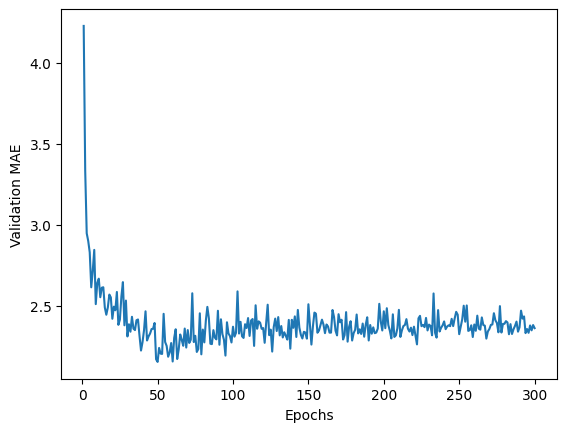

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets, epochs=300, batch_size=2, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/300
202/202 [==============================] - 1s 2ms/step - loss: 157.5936 - mae: 8.6189
Epoch 2/300
202/202 [==============================] - 0s 2ms/step - loss: 20.1051 - mae: 3.1574
Epoch 3/300
202/202 [==============================] - 0s 2ms/step - loss: 15.5126 - mae: 2.8014
Epoch 4/300
202/202 [==============================] - 0s 2ms/step - loss: 13.7757 - mae: 2.6546
Epoch 5/300
202/202 [==============================] - 0s 2ms/step - loss: 12.6388 - mae: 2.5171
Epoch 6/300
202/202 [==============================] - 0s 2ms/step - loss: 10.6981 - mae: 2.4000
Epoch 7/300
202/202 [==============================] - 0s 2ms/step - loss: 11.6667 - mae: 2.4590
Epoch 8/300
202/202 [==============================] - 0s 2ms/step - loss: 9.7826 - mae: 2.1971
Epoch 9/300
202/202 [==============================] - 1s 3ms/step - loss: 10.2715 - mae: 2.3370
Epoch 10/300
202/202 [==============================] - 1s 3ms/step - loss: 8.8407 - mae: 2.1868
Epoch 11/300
202/202 [========

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

best_model = build_model()
best_model.fit(train_data, train_targets, epochs=300, batch_size=2, verbose=1)

Epoch 1/300
202/202 [==============================] - 2s 3ms/step - loss: 207.1656 - mae: 10.2267
Epoch 2/300
202/202 [==============================] - 0s 2ms/step - loss: 24.4332 - mae: 3.5358
Epoch 3/300
202/202 [==============================] - 0s 2ms/step - loss: 16.8046 - mae: 2.8686
Epoch 4/300
202/202 [==============================] - 0s 2ms/step - loss: 12.7748 - mae: 2.5645
Epoch 5/300
202/202 [==============================] - 0s 2ms/step - loss: 11.5592 - mae: 2.4444
Epoch 6/300
202/202 [==============================] - 0s 2ms/step - loss: 10.8105 - mae: 2.3311
Epoch 7/300
202/202 [==============================] - 0s 2ms/step - loss: 11.1148 - mae: 2.4246
Epoch 8/300
202/202 [==============================] - 0s 2ms/step - loss: 10.0274 - mae: 2.3054
Epoch 9/300
202/202 [==============================] - 0s 2ms/step - loss: 9.0549 - mae: 2.2348
Epoch 10/300
202/202 [==============================] - 0s 2ms/step - loss: 8.6634 - mae: 2.1273
Epoch 11/300
202/202 [=======

In [ ]:
test_data -= mean
test_data /= std

pred = best_model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


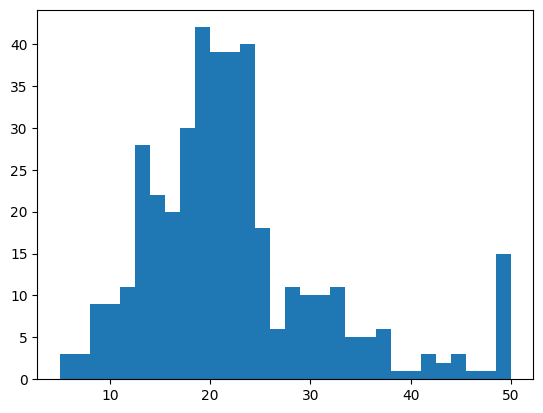

In [ ]:
plt.hist(np.sort(train_targets), bins=30)
plt.show()

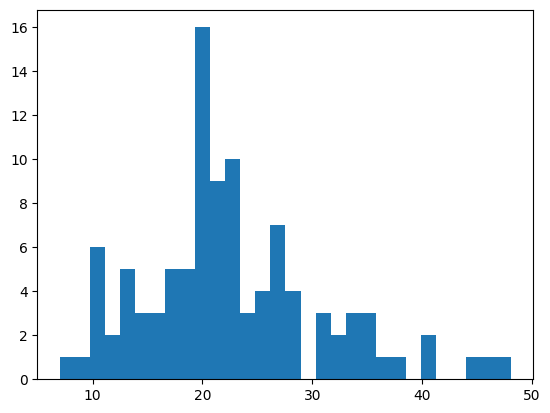

In [ ]:
plt.hist(np.sort(pred), bins=30)
plt.show()

Summary:

In this practical project I chose the Boston house dataset.
I tried different options to improve the model. I tried several optimizers: Adam and RMSprop with default laerning rate and learning rate = 0.0001. I tried different batch sizes: 1/2/3/6. I also added a few Dense Layers.

The lowest loss and mae we I managed to achieve are: loss: 0.7596, mae:  0.6496.